## Analyzing the $k$-Fold Network Training Results

In [13]:
# configure python path
import sys
import os
sys.path.append(os.path.abspath('..'))

# configure matplotlib
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'svg'

from IPython.display import HTML, display, Markdown
from tabulate import tabulate


import pickle
import numpy as np
from source.rel_path import rootDir

with open(os.path.join(rootDir, 'data', 'train_history.pickle'), 'rb') as inFile:
    trainHistory = pickle.load(inFile)

## Loss function value of each fold
The model is evaluated with 4-fold cross validation. The loss function values of each fold are shown as below. 

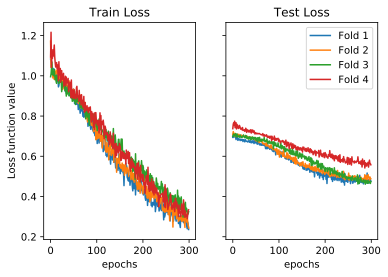

In [14]:
nFolds = len(trainHistory)
fig, axs = plt.subplots(1, 2, sharey='all')

for i in range(nFolds):
    historyDict = trainHistory[i]
    trainLoss = historyDict['loss']
    testLoss = historyDict['val_loss']
    ticks = np.arange(len(trainLoss))
    axs[0].plot(ticks, trainLoss)
    axs[1].plot(ticks, testLoss, label=f'Fold {i+1}')

axs[0].set_title('Train Loss')
axs[1].set_title('Test Loss')
axs[0].set_ylabel('Loss function value')
axs[0].set_xlabel('epochs')
axs[1].set_xlabel('epochs')
axs[1].legend()

plt.show()

## Last epoch ROC curves of each fold

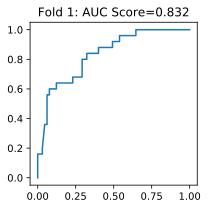

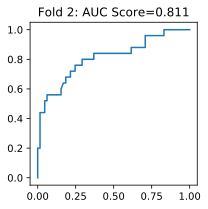

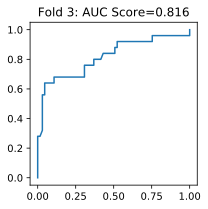

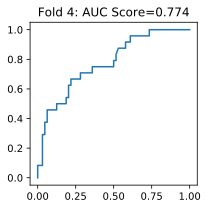

In [15]:
from sklearn.metrics import roc_curve, auc


for i in range(nFolds):
    fig = plt.figure(figsize=(3, 3))
    historyDict = trainHistory[i]
    y_true = historyDict['y_test_true']
    y_pred = historyDict['y_test_pred']
    fpr, tpr, thr = roc_curve(y_true, y_pred)
    aucScore = auc(fpr, tpr)
    testAuc = historyDict['val_auc_roc']
    plt.title('Fold {}: AUC Score={:.3f}'.format(i + 1, aucScore))
    plt.plot(fpr, tpr)
    plt.show()

## AUC scores of each fold
The train/test AUC scores of each fold are shown as below.

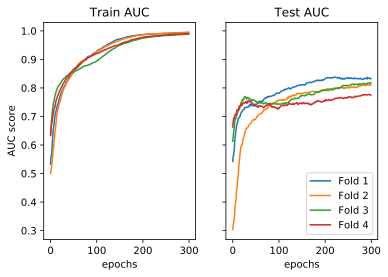

In [16]:
fig, axs = plt.subplots(1, 2, sharey='all')

for i in range(nFolds):
    historyDict = trainHistory[i]
    trainAuc = historyDict['precise_train_auc']
    testAuc = historyDict['precise_test_auc']
    assert len(trainAuc) == len(testAuc)
    ticks = np.arange(len(trainAuc))
    axs[0].plot(ticks, trainAuc)
    axs[1].plot(ticks, testAuc, label=f'Fold {i+1}')

axs[0].set_title('Train AUC')
axs[1].set_title('Test AUC')
axs[0].set_ylabel('AUC score')
axs[0].set_xlabel('epochs')
axs[1].set_xlabel('epochs')
axs[1].legend()

plt.show()

In [22]:
# generate AUC statistics
kfoldAucs = np.asarray([trainHistory[i]['precise_test_auc'][-1] for i in range(nFolds)]).squeeze()
print('Test AUC scores of the last epoch:')
print(kfoldAucs)
kfoldAucCenter = (kfoldAucs.max() + kfoldAucs.min()) / 2.0
kfoldAucDistance = kfoldAucs.max() - kfoldAucCenter
print('AUC summary:')
display(Markdown('Spatial AUC=${:.2f} \pm {:.2f}$'.format(kfoldAucCenter, kfoldAucDistance)))

Test AUC scores of the last epoch:
[0.832      0.81076923 0.816      0.77441406]
AUC summary:


Spatial AUC=$0.80 \pm 0.03$

## Other performance evaluation metrics

In [29]:
from sklearn.metrics import classification_report

for i in range(nFolds):
    y_true = trainHistory[i]['y_test_true']
    y_pred = trainHistory[i]['y_test_pred']
    y_pred = y_pred > 0.5
    report = classification_report(y_true, y_pred)
    print(report)
    

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        65
           1       0.52      0.64      0.57        25

    accuracy                           0.73        90
   macro avg       0.68      0.70      0.69        90
weighted avg       0.76      0.73      0.74        90

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        65
           1       0.60      0.60      0.60        25

    accuracy                           0.78        90
   macro avg       0.72      0.72      0.72        90
weighted avg       0.78      0.78      0.78        90

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        65
           1       0.73      0.64      0.68        25

    accuracy                           0.83        90
   macro avg       0.80      0.77      0.78        90
weighted avg       0.83      0.83      0.83        90

              preci